# Construction of IO dataset for OPF BBMS

In this notebook, we aim at constructing


In [1]:
# Importing libraries
import os
from pathlib import Path
import dill as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

import greyboxmodels.cpsmodels.physical.electrical.PowerFlowPowerGrid as PG
import greyboxmodels.cpsmodels.Plant as Plant

# Set the working directory
os.chdir("D:/projects/IPTLC_BBMs")
print(f"Current working directory: {os.getcwd()}")

Current working directory: D:\projects\IPTLC_BBMs


In [12]:
# Data folder path
data_folder = Path("D:/projects/Hierarchical_CPS_models/data/simulations/controlled_exponential_pg/20240311_011412/")

# Target simulation
target_simulation = "simulation_0.pkl"
target_simulation = data_folder / target_simulation

# Specify the path to save the processed data and create the folder if it doesn't exist
processed_data_folder = Path("data/OPF/") / data_folder.name
os.makedirs(processed_data_folder, exist_ok=True)

# Print the folders
print(f"Data folder: {data_folder}")
print(f"Target simulation: {target_simulation}")
print(f"Processed data folder: {processed_data_folder}")

Data folder: D:\projects\Hierarchical_CPS_models\data\simulations\controlled_exponential_pg\20240311_011412
Target simulation: D:\projects\Hierarchical_CPS_models\data\simulations\controlled_exponential_pg\20240311_011412\simulation_0.pkl
Processed data folder: data\OPF\20240311_011412


In [13]:
# Open the data
with open(target_simulation, "rb") as f:
    sim_data = pickle.load(f)

sim_data.keys()

dict_keys(['time', 'external_stimuli', 'state', 'step_data', 'plant'])

In [14]:
sim_data['step_data'][0].keys() # CC input: 'cc_input'. CC output: 'pg_control_input'

dict_keys(['state_pre_update', 'state_post_update', 'power_demands', 'cc_input', 'pg_control_input', 'pg_response', 'power_grid_step_data', 'control_center_step_data'])

In [15]:
# Open the plant
with open(data_folder / "plant.pkl", "rb") as f:
    plant = pickle.load(f)

plant

In [16]:
# Get the power grid and the control center
power_grid = plant.power_grid
control_center = plant.control_center

In [17]:
# Get the name of the states
# name_mapping = {'Pd': 'Active power demand',
#                 'Qd': 'Reactive power demand',
#                 'Pg': 'Active power generation',
#                 'Qg': 'Reactive power generation',
#                 'Vm': 'Voltage magnitude',
#                 'Va': 'Voltage angle',
#                 'ILine': 'Line current',
#                 'LTrafo': 'Transformer loading',
#                 'piGen': 'Generator status',
#                 'piLine': 'Line status',
#                 'piTrafo': 'Transformer status'}
name_mapping = None

pg_states = Plant.get_variables_names(plant.power_grid.state_idx, name_mapping)
pg_ext_stims = Plant.get_variables_names(plant.power_grid.uncontrolled_inputs_idx, name_mapping)
pg_cont_inputs = Plant.get_variables_names(plant.power_grid.controlled_inputs_idx, name_mapping)

cc_states = Plant.get_variables_names(plant.control_center.state_idx, name_mapping)
cc_cont_inputs = Plant.get_variables_names(plant.control_center.controlled_inputs_idx, name_mapping)

print(f"Power grid states: {pg_states}\n")
print(f"Power grid external stimuli: {pg_ext_stims}\n")
print(f"Power grid control inputs: {pg_cont_inputs}\n")

print(f"Control center states: {cc_states}\n")
print(f"Control center control inputs: {cc_cont_inputs}\n")

Power grid states: ['Pd 0', 'Pd 1', 'Pd 2', 'Pd 3', 'Pd 4', 'Pd 5', 'Pd 6', 'Pd 7', 'Pd 8', 'Pd 9', 'Pd 10', 'Qd 0', 'Qd 1', 'Qd 2', 'Qd 3', 'Qd 4', 'Qd 5', 'Qd 6', 'Qd 7', 'Qd 8', 'Qd 9', 'Qd 10', 'Pg 0', 'Pg 1', 'Pg 2', 'Pg 3', 'Pg 4', 'Qg 0', 'Qg 1', 'Qg 2', 'Qg 3', 'Qg 4', 'Vm 0', 'Vm 1', 'Vm 2', 'Vm 3', 'Vm 4', 'Vm 5', 'Vm 6', 'Vm 7', 'Vm 8', 'Vm 9', 'Vm 10', 'Vm 11', 'Vm 12', 'Vm 13', 'Va 0', 'Va 1', 'Va 2', 'Va 3', 'Va 4', 'Va 5', 'Va 6', 'Va 7', 'Va 8', 'Va 9', 'Va 10', 'Va 11', 'Va 12', 'Va 13', 'ILine 0', 'ILine 1', 'ILine 2', 'ILine 3', 'ILine 4', 'ILine 5', 'ILine 6', 'ILine 7', 'ILine 8', 'ILine 9', 'ILine 10', 'ILine 11', 'ILine 12', 'ILine 13', 'ILine 14', 'LTrafo 0', 'LTrafo 1', 'LTrafo 2', 'LTrafo 3', 'LTrafo 4', 'piGen 0', 'piGen 1', 'piGen 2', 'piGen 3', 'piGen 4', 'piLine 0', 'piLine 1', 'piLine 2', 'piLine 3', 'piLine 4', 'piLine 5', 'piLine 6', 'piLine 7', 'piLine 8', 'piLine 9', 'piLine 10', 'piLine 11', 'piLine 12', 'piLine 13', 'piLine 14', 'piTrafo 0', 'piTraf

In [18]:
sim_data['step_data'][0]['control_center_step_data'].keys()

dict_keys(['opf_convergence', 'opf_cost', 'opf_options', 'opf_input', 'opf_output'])

In [19]:
# Get inputs and outputs
opf_inputs = np.array([x['control_center_step_data']["opf_input"] for x in sim_data['step_data']])
opf_outputs = np.array([x['control_center_step_data']["opf_output"] for x in sim_data['step_data']])

# Shapes
print(f"CC inputs shape: {opf_inputs.shape}")
print(f"CC outputs shape: {opf_outputs.shape}")

CC inputs shape: (384, 52)
CC outputs shape: (384, 10)


In [22]:
# Create a function that receives a path to a simulation and returns the inputs and outputs
def get_opf_data(filepath: Path):
    # Open the data
    with open(filepath, "rb") as f:
        sim_data = pickle.load(f)

    # Get the inputs and outputs
    opf_inputs = np.array([x['control_center_step_data']["opf_input"] for x in sim_data['step_data']])
    opf_outputs = np.array([x['control_center_step_data']["opf_output"] for x in sim_data['step_data']])

    return opf_inputs, opf_outputs

# Test the function
opf_inputs, opf_outputs = get_opf_data(target_simulation)
print(f"Testing the file: {target_simulation}")
print(f"CC inputs shape: {opf_inputs.shape}")
print(f"CC outputs shape: {opf_outputs.shape}")

Testing the file: D:\projects\Hierarchical_CPS_models\data\simulations\controlled_exponential_pg\20240311_011412\simulation_0.pkl
CC inputs shape: (384, 52)
CC outputs shape: (384, 10)


In [21]:
# Now, a function that iterates over all the simulations and returns the inputs and outputs in a single numpy array
def get_opf_data_all(data_folder: Path):
    # Create an empty list to store the inputs and outputs
    inputs = []
    outputs = []

    # Create a list of the target folders: they are called "simulation_0.pkl", "simulation_1.pkl", etc.
    target_folders = [f for f in data_folder.iterdir() if f.is_file() and f.name.startswith("simulation") and f.name.endswith(".pkl")]

    # Iterate over all the simulations and get the inputs and outputs for each one
    for f in tqdm.tqdm(target_folders):
        # Get the inputs and outputs
        opf_inputs, opf_outputs = get_opf_data(f)

        # Append the inputs and outputs to the lists
        inputs.append(opf_inputs)
        outputs.append(opf_outputs)

    # Concatenate the inputs and outputs
    inputs_matrix = np.concatenate(inputs, axis=0)
    outputs_matrix = np.concatenate(outputs, axis=0)

    # Get the plant
    with open(data_folder / "plant.pkl", "rb") as f:
        plant = pickle.load(f)

    return inputs_matrix, outputs_matrix, plant

# Test the function
opf_inputs, opf_outputs, plant = get_opf_data_all(data_folder)
print(f"CC inputs shape: {opf_inputs.shape}")
print(f"CC outputs shape: {opf_outputs.shape}")

  0%|          | 1/233 [00:00<02:56,  1.32it/s]


UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [24]:
# Save the inputs and outputs to numpy arrays
inputs_path = processed_data_folder / "opf_inputs.npy"
outputs_path = processed_data_folder / "opf_outputs.npy"

np.save(inputs_path, opf_inputs)
np.save(outputs_path, opf_outputs)

## Normalize the inputs and outputs

In [33]:
# Create a function to normalize an array as above
def min_max_normalize(array: np.ndarray, min_array: np.ndarray = None, max_array: np.ndarray = None):
    if min_array is None:
        min_array = array.min(axis=0)
        max_array = array.max(axis=0)

        min_array[min_array == max_array] = min_array[min_array == max_array] - 1
        max_array[min_array == max_array] = max_array[min_array == max_array]

    array_normalized = (array - min_array) / (max_array - min_array)

    return array_normalized, min_array, max_array

In [26]:
# Inputs
opf_inputs_normalized, min_opf_input, max_opf_input = min_max_normalize(opf_inputs)

opf_inputs_normalized[:5, :]

array([[0.43234069, 0.48814878, 0.3074137 , 0.2328961 , 0.31561026,
        0.22200999, 0.27781328, 0.36209159, 0.30383157, 0.42075949,
        0.32690943, 0.3360974 , 0.23310331, 0.6664261 , 0.29473304,
        0.40859122, 0.26651904, 0.29149763, 0.37961327, 0.2476204 ,
        0.35730255, 0.23498787, 0.9785757 , 0.97386844, 0.96970604,
        0.99999989, 0.99997218, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.27631845, 0.41752054, 0.24805954, 0.20980309, 0.33037782,
        0.25337282, 0.25758521, 0.29011484, 0.29686489, 0.45620317,
        0.30648458, 0.29309542, 0.2278384 , 0.71522424, 0.39034869,
        0.35785875, 0.27236403, 0.31360573, 0.27790089, 0.28915099,
        0.28141

In [27]:
# Outputs
opf_outputs_normalized, min_opf_output, max_opf_output = min_max_normalize(opf_outputs)

opf_outputs_normalized[:5, :]

array([[6.78070773e-01, 9.46253156e-08, 2.74957824e-01, 1.83460450e-01,
        1.36473544e-01, 9.79757339e-01, 9.74414925e-01, 9.69051649e-01,
        9.99999860e-01, 9.94262194e-01],
       [6.36498747e-01, 5.34955836e-08, 2.75864017e-01, 1.84882760e-01,
        1.37313718e-01, 9.76693165e-01, 9.71970732e-01, 9.67546963e-01,
        9.99999891e-01, 9.96645212e-01],
       [6.53205390e-01, 6.25680208e-08, 2.75751918e-01, 1.84685651e-01,
        1.37193738e-01, 9.78129046e-01, 9.73158654e-01, 9.68230646e-01,
        9.99999892e-01, 9.97177420e-01],
       [6.15111773e-01, 4.14596992e-08, 2.76066751e-01, 1.85304292e-01,
        1.37570647e-01, 9.74647614e-01, 9.70146891e-01, 9.66250137e-01,
        9.99999905e-01, 9.95392425e-01],
       [5.85845596e-01, 2.95204788e-08, 2.76192363e-01, 1.85785243e-01,
        1.37888156e-01, 9.72482836e-01, 9.68380178e-01, 9.65162404e-01,
        9.99999918e-01, 9.95937981e-01]])

In [28]:
# Save the normalized inputs and outputs to numpy arrays
inputs_normalized_path = processed_data_folder / "opf_inputs_minmax_normalized.npy"
outputs_normalized_path = processed_data_folder / "opf_outputs_minmax_normalized.npy"

np.save(inputs_normalized_path, opf_inputs_normalized)
np.save(outputs_normalized_path, opf_outputs_normalized)

# Also, save the min and max values
min_max_values = {"min_opf_input": min_opf_input,
                  "max_opf_input": max_opf_input,
                  "min_opf_output": min_opf_output,
                  "max_opf_output": max_opf_output}

min_max_values_path = processed_data_folder / "norm_min_max_values.pkl"
with open(min_max_values_path, "wb") as f:
    pickle.dump(min_max_values, f)

# Ground truth data

In [ ]:
gt_sim_ids = [0, 2, 3, 4, 5, 35, 114, 116]

In [29]:
# Choose a simulation
gt_sim = data_folder / "simulation_5.pkl"

# Open the minimum and maximum values
with open(min_max_values_path, "rb") as f:
    min_max_values = pickle.load(f)

min_opf_input = min_max_values["min_opf_input"]
max_opf_input = min_max_values["max_opf_input"]
min_opf_output = min_max_values["min_opf_output"]
max_opf_output = min_max_values["max_opf_output"]

# Do as above and save to a file
gt_inputs, gt_outputs = get_opf_data(gt_sim)

gt_inputs_normalized, _, _ = min_max_normalize(gt_inputs, min_opf_input, max_opf_input)
gt_outputs_normalized, _, _ = min_max_normalize(gt_outputs, min_opf_output, max_opf_output)

gt_inputs_normalized_path = processed_data_folder / "gt_inputs_minmax_normalized.npy"
gt_outputs_normalized_path = processed_data_folder / "gt_outputs_minmax_normalized.npy"

np.save(gt_inputs_normalized_path, gt_inputs_normalized)
np.save(gt_outputs_normalized_path, gt_outputs_normalized)

# EXPERIMENTAL BELOW

In [23]:
# Target simulation
target_simulation = "simulation_0.pkl"
target_simulation = data_folder / target_simulation
opf_inputs, opf_outputs = get_opf_data(target_simulation)

In [29]:
min_max_values_path = processed_data_folder / "norm_min_max_values.pkl"
with open(min_max_values_path, "rb") as f:
    min_max_values = pickle.load(f)
min_opf_input = min_max_values["min_opf_input"]
max_opf_input = min_max_values["max_opf_input"]
min_opf_output = min_max_values["min_opf_output"]
max_opf_output = min_max_values["max_opf_output"]
print(min_max_values)

{'min_opf_input': array([ 7.55458678, 20.8721442 , 12.84253231,  2.22920503,  3.2286633 ,
        7.44660907,  2.31033896,  0.89981731,  1.70981704,  4.06369678,
        3.93282692,  2.69037779,  3.40589158, -3.53592906,  0.4613891 ,
        2.12250569,  4.48063813,  1.6087452 ,  0.54362093,  0.40931601,
        1.76512754,  1.06758555,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ]), 'max_opf_input': array([20.61504955, 80.35481058, 46.16036842,  7.7598224 , 11.06340455,
       26.12875817,  6.70240286,  2.89316318,  6.23662962, 12.86687463,
       11.87234903,  9.53783814, 13.07830374, -1.08472794,  1.4643

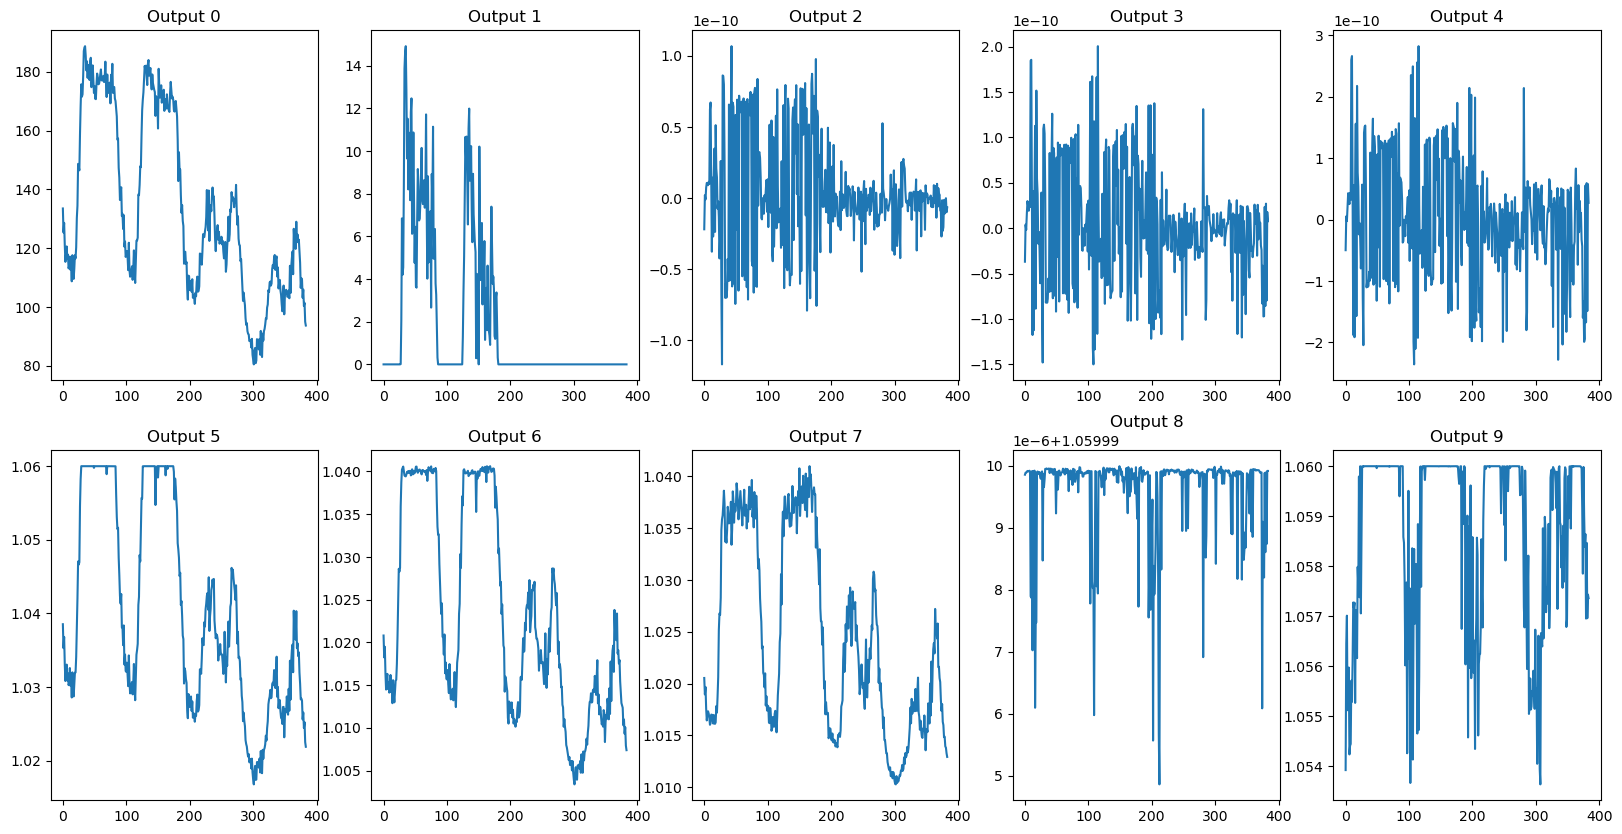

In [31]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()

for i in range(10):
    axs[i].plot(opf_outputs[:, i])
    axs[i].set_title(f"Output {i}")

In [40]:
max_opf_output[3]

2.3405250040302225e-08

In [41]:
max_opf_output[4]

5.660975629227652e-08

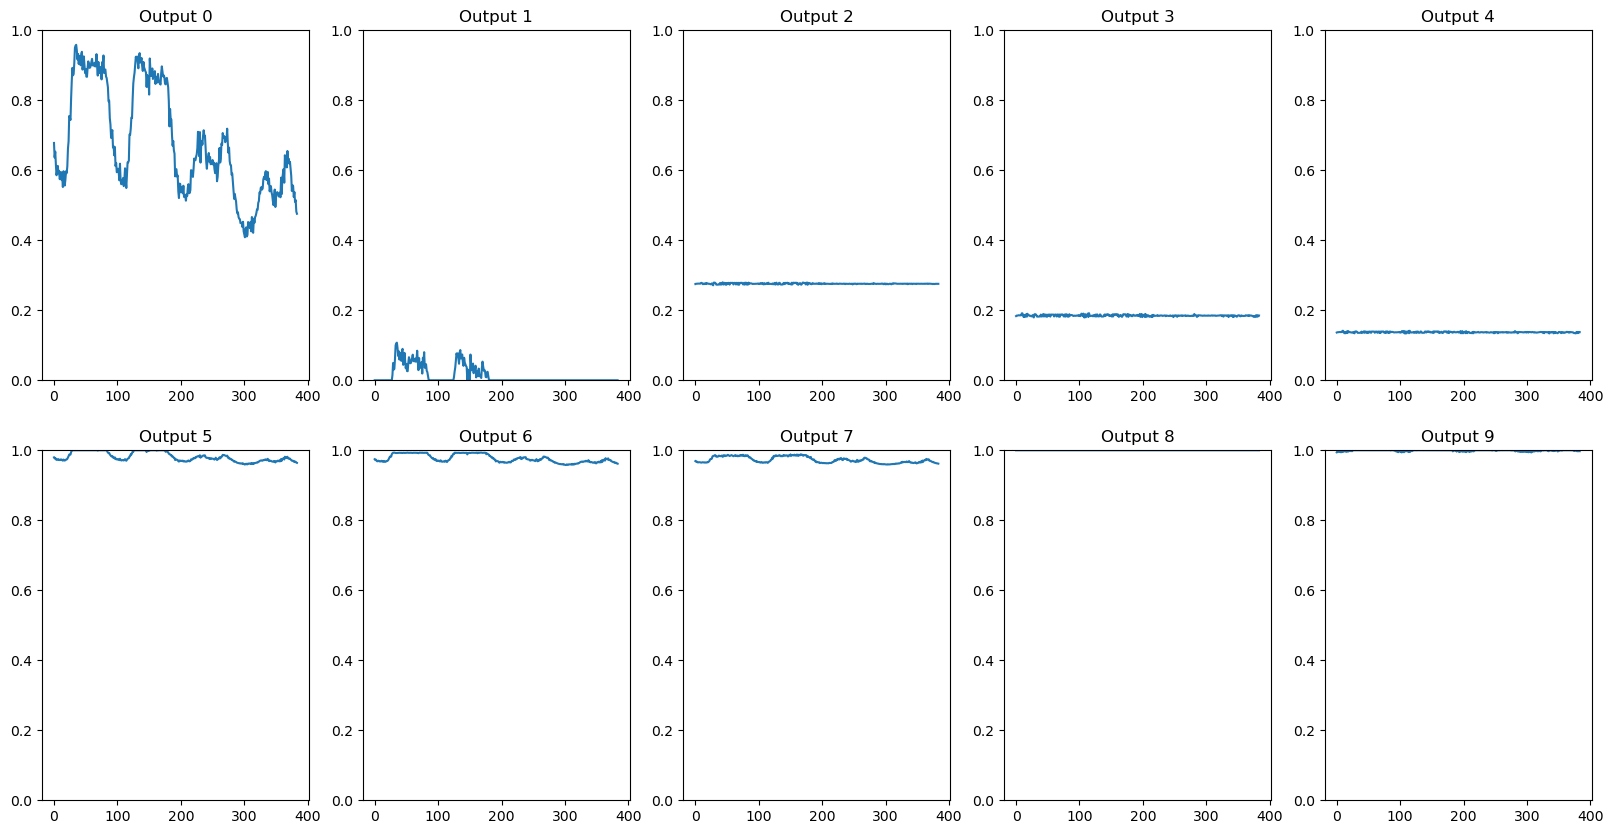

In [35]:
# normalize
opf_inputs_normalized, _, _ = min_max_normalize(opf_inputs, min_opf_input, max_opf_input)
opf_outputs_normalized, _, _ = min_max_normalize(opf_outputs, min_opf_output, max_opf_output)

# Plot
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()

for i in range(10):
    axs[i].plot(opf_outputs_normalized[:, i])
    axs[i].set_title(f"Output {i}")
    axs[i].set_ylim(0, 1)